In [48]:
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import transformers
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [52]:
model = AutoModelForTokenClassification.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
tokenizer = AutoTokenizer.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
metaphor_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def count_label_1(entities):
        count = 0
        for entity in entities:
            if entity['entity_group'] == 'LABEL_1':
                count += 1
        return count

In [55]:
dr_s_df = pd.read_json(r"annotated_data\fitzgerald_babylon_dr_s_annotations.jsonl", lines=True)
william_df = pd.read_json(r"annotated_data\fitzgerald_babylon_william_annotations.jsonl", lines=True)

In [58]:
df = pd.concat([dr_s_df, william_df])
df = df.rename(columns={"label": "annotator_label"})
df.head()

,annotator,sentence_number,text,annotator_label
0,dr_s,1,And where's Mr. Campbell?,l
1,dr_s,2,Charlie asked.,l
2,dr_s,3,Gone to Switzerland.,l
3,dr_s,4,"Mr. Campbell's a pretty sick man, Mr. Wales.",l
4,dr_s,5,I'm sorry to hear that.,l


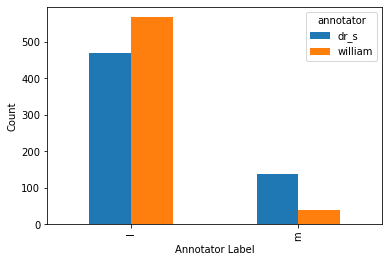

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# group by 'annotator' and 'annotator_label' columns and count the occurrences of each label
grouped = df.groupby(['annotator', 'annotator_label']).size().reset_index(name='counts')

# pivot the data so that each annotator is a column
pivoted = grouped.pivot(index='annotator_label', columns='annotator', values='counts')

# create a bar plot
pivoted.plot.bar()

# add x and y labels
plt.xlabel('Annotator Label')
plt.ylabel('Count')

# show plot
plt.show()


In [81]:
df_model = df['text'].apply(lambda x: metaphor_pipeline(x)).to_frame(name='model_entities')
df_model['annotator'] = 'model'
df_final = pd.concat([df[['sentence_number', 'text']], df_model], axis=1)
df_final['annotator_label'] = df_final['model_entities'].apply(count_label_1).apply(lambda x: 'm' if x > 0 else 'l')

In [80]:
cols = ['annotator', 'sentence_number', ]
df_final

,sentence_number,model_entities,annotator,annotator_label
0,1,"[{'entity_group': 'LABEL_0', 'score': 0.999957...",model,l
1,2,"[{'entity_group': 'LABEL_0', 'score': 0.999983...",model,l
2,3,"[{'entity_group': 'LABEL_0', 'score': 0.999958...",model,l
3,4,"[{'entity_group': 'LABEL_0', 'score': 0.998679...",model,l
4,5,"[{'entity_group': 'LABEL_0', 'score': 0.999972...",model,m
...,...,...,...,...
601,602,"[{'entity_group': 'LABEL_0', 'score': 0.991302...",model,l
602,603,"[{'entity_group': 'LABEL_0', 'score': 0.999836...",model,m
603,604,"[{'entity_group': 'LABEL_0', 'score': 0.999968...",model,m
604,605,"[{'entity_group': 'LABEL_0', 'score': 0.999984...",model,m


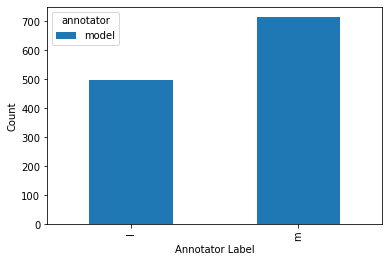

In [75]:
# group by 'annotator' and 'annotator_label' columns and count the occurrences of each label
grouped = df_final.groupby(['annotator', 'annotator_label']).size().reset_index(name='counts')

# pivot the data so that each annotator is a column
pivoted = grouped.pivot(index='annotator_label', columns='annotator', values='counts')

# create a bar plot
pivoted.plot.bar()

# add x and y labels
plt.xlabel('Annotator Label')
plt.ylabel('Count')

# show plot
plt.show()

In [32]:
df['match'] = np.where(df['annotator_label'] == df['model_label'], 'Yes', 'No')

In [33]:
df['annotator_label'].unique()

array(['l', 'm'], dtype=object)

In [34]:
labels = df['annotator_label'].value_counts()
labels

l    470
m    136
Name: annotator_label, dtype: int64

In [35]:
model_labelling = df['model_label'].value_counts()
model_labelling

m    357
l    249
Name: model_label, dtype: int64

In [36]:
pd.set_option('display.max_rows', 750)
df

,annotator,sentence_number,text,annotator_label,model_entities,metaphor_counts,model_label,match
0,dr_s,1,And where's Mr. Campbell?,l,"[{'entity_group': 'LABEL_0', 'score': 0.999957...",0,l,Yes
1,dr_s,2,Charlie asked.,l,"[{'entity_group': 'LABEL_0', 'score': 0.999983...",0,l,Yes
2,dr_s,3,Gone to Switzerland.,l,"[{'entity_group': 'LABEL_0', 'score': 0.999958...",0,l,Yes
3,dr_s,4,"Mr. Campbell's a pretty sick man, Mr. Wales.",l,"[{'entity_group': 'LABEL_0', 'score': 0.998679...",0,l,Yes
4,dr_s,5,I'm sorry to hear that.,l,"[{'entity_group': 'LABEL_0', 'score': 0.999972...",1,m,No
5,dr_s,6,And George Hardt?,l,"[{'entity_group': 'LABEL_0', 'score': 0.999994...",0,l,Yes
6,dr_s,7,Charlie inquired.,l,"[{'entity_group': 'LABEL_0', 'score': 0.999978...",0,l,Yes
7,dr_s,8,"Back in America, gone to work.",l,"[{'entity_group': 'LABEL_1', 'score': 0.988113...",1,m,No
8,dr_s,9,And where is the Snow Bird? He was in here las...,m,"[{'entity_group': 'LABEL_0', 'score': 0.999961...",0,l,No
9,dr_s,10,"Anyway, his friend, Mr. Schaeffer, is in Paris.",l,"[{'entity_group': 'LABEL_0', 'score': 0.999991...",0,l,Yes


In [45]:
test_example = df.loc[16, 'model_entities']
test_example

[{'entity_group': 'LABEL_0',
  'score': 0.9987846,
  'word': 'But the stillness in the Ritz bar was strange and portentous.',
  'start': 0,
  'end': 61}]

In [46]:
test_example = df.loc[51, 'model_entities']
test_example

[{'entity_group': 'LABEL_0',
  'score': 0.9895305,
  'word': 'Outside, the fire-red, gas-blue,',
  'start': 0,
  'end': 32},
 {'entity_group': 'LABEL_1',
  'score': 0.8726941,
  'word': 'ghost',
  'start': 33,
  'end': 38},
 {'entity_group': 'LABEL_0',
  'score': 0.9274699,
  'word': '-green signs shone smokily through the tranquil rain.',
  'start': 38,
  'end': 91}]

In [38]:
counts = df['match'].value_counts(normalize=True) * 100
counts

Yes    55.940594
No     44.059406
Name: match, dtype: float64

In [39]:
df['mismatch'] = np.where((df['annotator_label'] == 'm') & (df['model_label'] == 'Yes'), 'mismatch_m', 
                 np.where((df['annotator_label'] == 'l') & (df['model_label'] == 'No'), 'mismatch_l', 'match'))

mismatch_counts = df['mismatch'].value_counts()

mismatches_m = 0
if 'mismatch_m' in mismatch_counts:
    mismatches_m = mismatch_counts['mismatch_m']

mismatches_l = 0
if 'mismatch_l' in mismatch_counts:
    mismatches_l = mismatch_counts['mismatch_l']

if mismatches_m > mismatches_l:
    print("Most mismatches are for label 'm'")
elif mismatches_m < mismatches_l:
    print("Most mismatches are for label 'l'")
else:
    print("Equal number of mismatches for both labels")

Equal number of mismatches for both labels


In [40]:
print(mismatches_m)
print(mismatches_l)

0
0


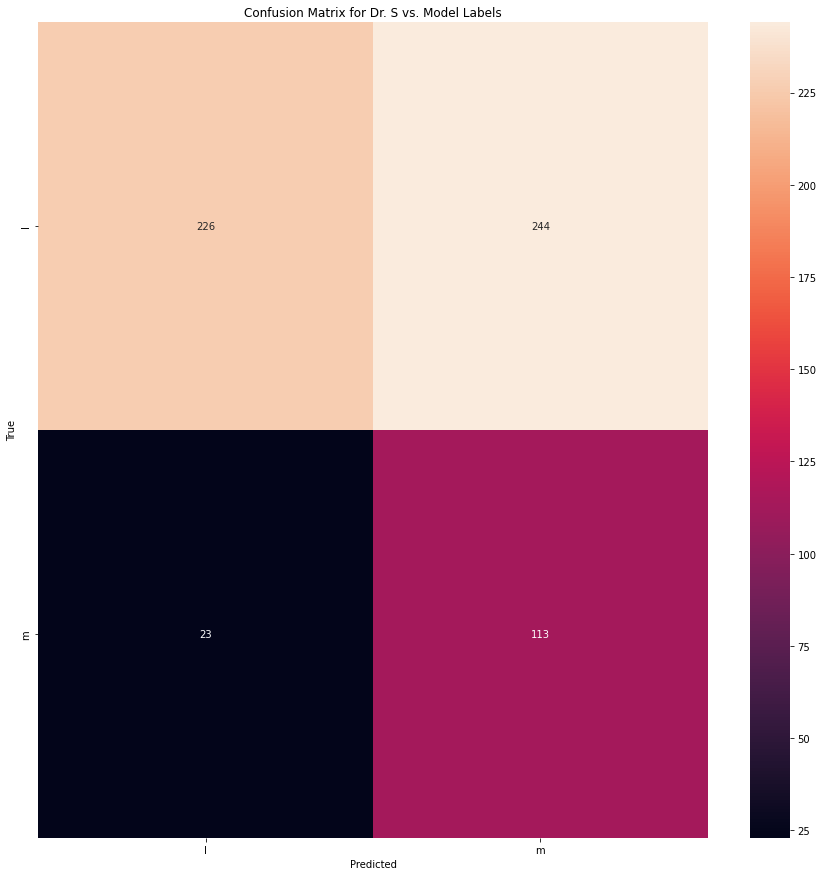

In [41]:
y_true = df['annotator_label']
y_pred = df['model_label']

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(15, 15))  
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['l', 'm'], yticklabels=['l', 'm'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Dr. S vs. Model Labels")
plt.show()